In [10]:
import cv2
import numpy as np
# import pandas as pd
import os
import pickle
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from PIL import Image

from builtins import input
import cv2 as cv
import numpy as np
import os 

DATA AUGMENTATION FOR AN IMAGE

In [61]:
input = "/home/huyentn2/huyen/project/new_folder/cv_proj/DualStyleGAN/data_preparation/cartoon_images/0_1_001_00504.jpg"

img_name = input.split("/")[-1]

output_dir = "/home/huyentn2/huyen/project/new_folder/cv_proj/DualStyleGAN/data_preparation/cartoon_images_augment/"+ img_name.split(".")[0] +"/"


if not os.path.exists(output_dir):
    os.makedirs(output_dir)

BLUR

In [62]:
image = Image.open(input)
sigma = [0.5, 1, 2,3,5]

for s in sigma:
    blurred_image = image.filter(ImageFilter.GaussianBlur(radius=s))
    
    # Pasting the blurred image on the original image
    image.paste(blurred_image, (0,0))

    image.save(output_dir + "blur_" + str(s) +"_"+ img_name)


CHANGE LIGHTING

In [63]:
from PIL import Image, ImageEnhance

#read the image
im = Image.open(input)

#image brightness enhancer
enhancer = ImageEnhance.Brightness(im)

factors = [0.5,1.5, 2, 3]
for factor in factors:
    # factor = 0.5 #darkens the image
    im_output = enhancer.enhance(factor)
    im_output.save(output_dir + "delight_" + str(factor) +"_"+ img_name)

# factor = 1.5 #brightens the image
# im_output = enhancer.enhance(factor)
# im_output.save(output_dir + "delight_" + str(factor) +"_"+ img_name)

CROP

In [53]:
from PIL import Image
from random import randrange

img = Image.open(input)  
x, y = img.size

matrix = 256
sample = 10
sample_list = []

for i in range(sample):
    x1 = randrange(0, x//2)
    y1 = randrange(y//4, y//2)
    sample_list.append(img.crop((x1, y1, x1 + matrix, y1 + matrix)))

    crop = img.crop((x1, y1, x1 + matrix, y1 + matrix)).resize((512,512))
    # im = Image.fromarray(crop)
    crop.save(output_dir + "randcrop_" + str(i) +"_"+ img_name)


ROTATE AND FLIP

In [54]:
import cv2
import numpy as np

def rotateImage(image, angle):
    center=tuple(np.array(image.shape[0:2])/2)
    rot_mat = cv2.getRotationMatrix2D(center,angle,1.0)
    return cv2.warpAffine(image, rot_mat, image.shape[0:2],flags=cv2.INTER_LINEAR)


img = np.asarray(Image.open(input))
angles = [45, 90, 135, 180]
for angle in angles:
    new_image = rotateImage(img, angle)
    new_image = Image.fromarray(new_image)
    new_image.save(output_dir + "rot_" + str(angle) +"_"+ img_name)



new_image = np.flip(img, axis=1)
new_image = Image.fromarray(new_image)
new_image.save(output_dir + "flip_" + img_name)

COLOR JITTER

In [66]:
import cv2
import numpy as np
from pylab import *
from random import randrange

# input = "/home/huyentn2/huyen/project/new_folder/cv_proj/DualStyleGAN/data_preparation/cartoon_images/0_1_006_05064.jpg"

img = cv2.imread(input)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # cv2 defaul color code is BGR
h,w,c = img.shape # (768, 1024, 3)

noise = np.random.randint(0,50,(h, w)) # design jitter/noise here
zitter = np.zeros_like(img)
zitter[:,:,1] = noise  

noise_added = cv2.add(img, zitter)

x1 = randrange(0, h//2)
y1 = randrange(0, w//2)
z1 = randrange(h//4, h)

combined = img
combined[x1: (x1+z1),y1:(y1+z1),:] = noise_added[x1: (x1+z1),y1:(y1+z1),:]
combined = Image.fromarray(combined)
combined.save(output_dir + "jitter_" + img_name)

In [60]:
plt.show(Image.open(input))

VISUALIZATION

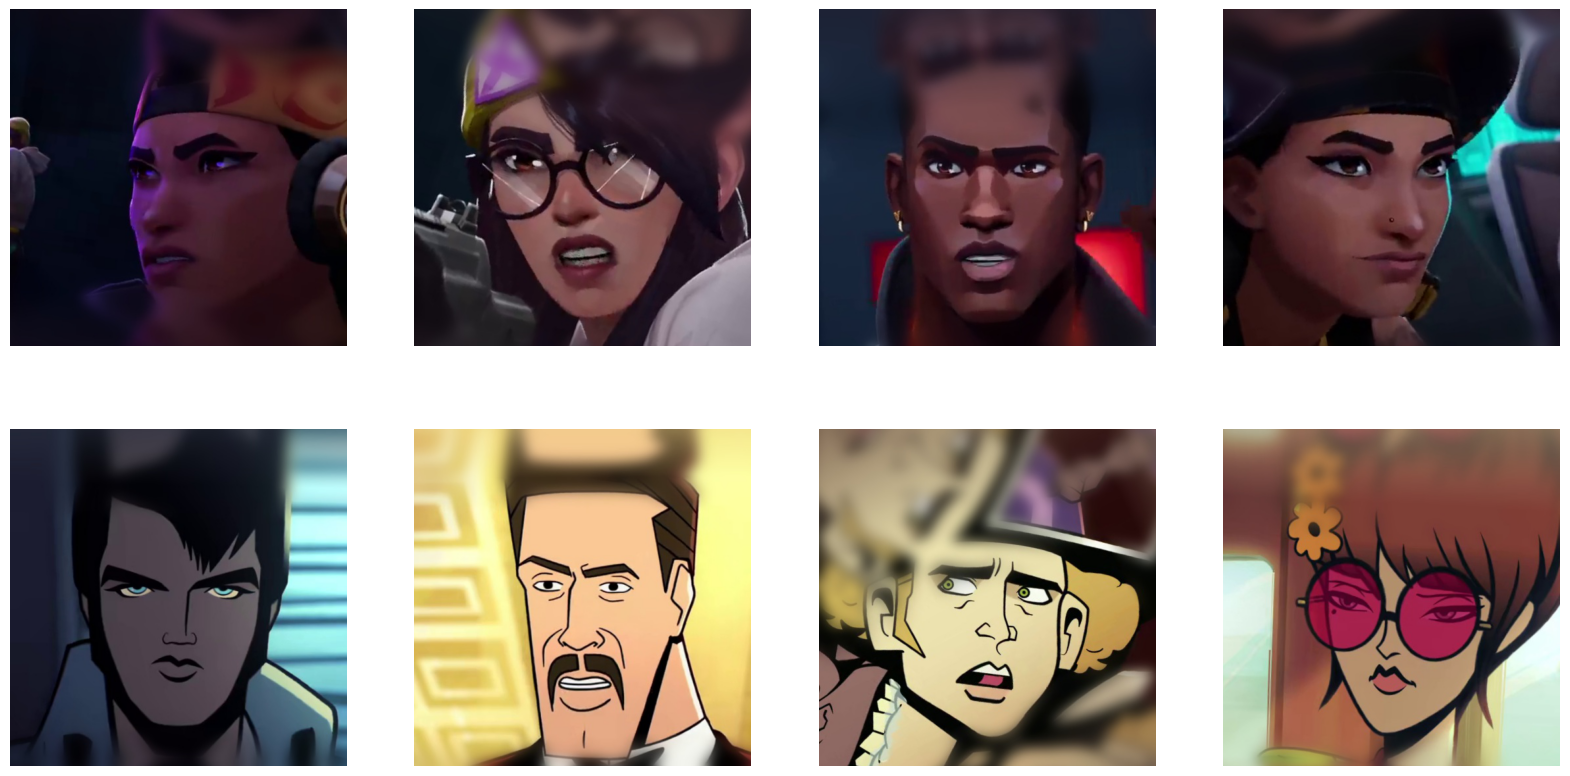

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

input = "/home/huyentn2/huyen/project/new_folder/cv_proj/DualStyleGAN/data_preparation/cartoon_images/"
files = ["0_1_006_05064.jpg", "0_1_005_04896.jpg", "0_1_003_04128.jpg", "0_1_001_00504.jpg",
         "12_1_016_20640.jpg", "12_1_021_26712.jpg", "13_1_011_09408.jpg", "14_1_024_24288.jpg"]

inp = [Image.open(input+ file)  for file in files]




# inp1 = "0_1_006_05064.jpg"
# img1 = Image.open(input+ inp1)  
# inp.append(img1)


w = 25
h = 25
fig = plt.figure(figsize=(20, 10))
columns = 4
rows = 2
for i in range(1, columns*rows +1):
    # img = np.random.randint(10, size=(h,w))
    fig.add_subplot(rows, columns, i)
    plt.axis('off')
    plt.imshow(inp[i-1])
    
plt.show()
fig.savefig("/home/huyentn2/huyen/project/new_folder/cv_proj/DualStyleGAN/data_preparation/report/sample.png", bbox_inches='tight')


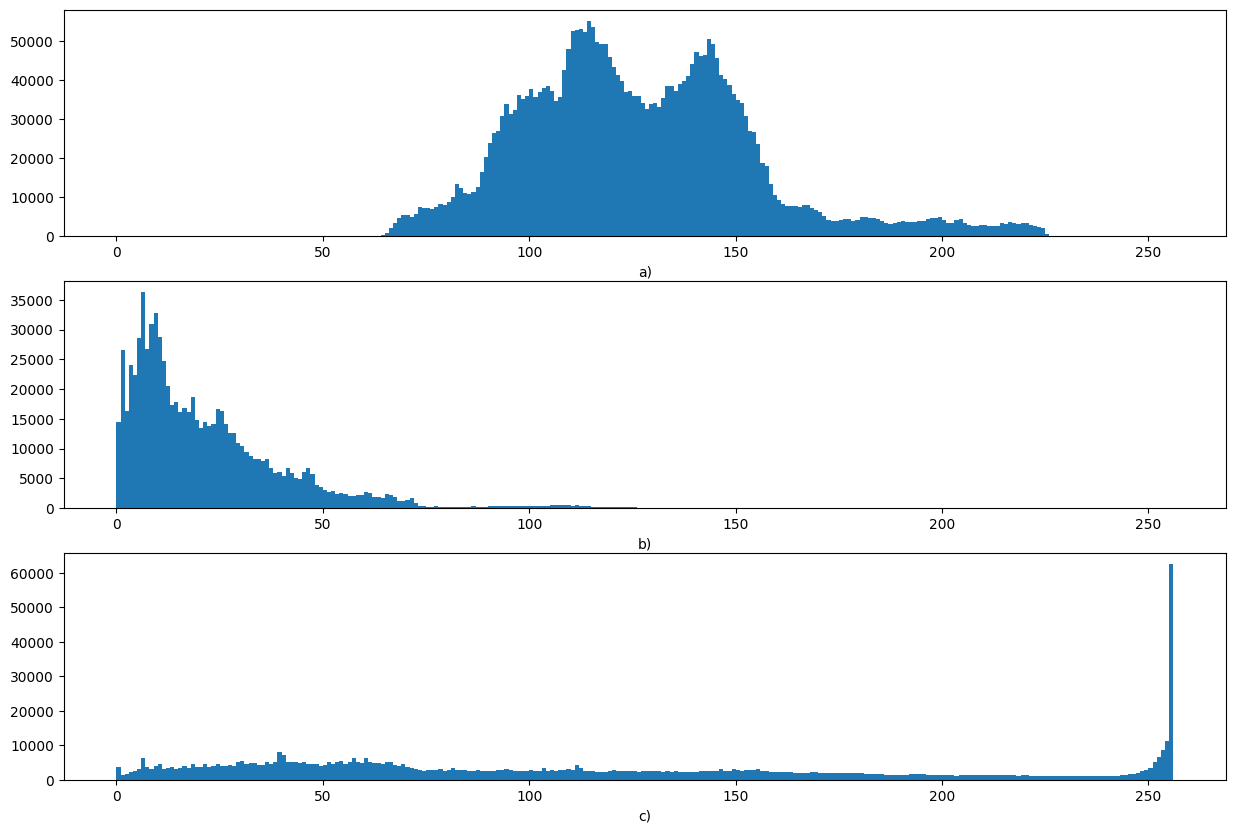

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


imgs = []
input_dir = "/home/huyentn2/huyen/project/new_folder/cv_proj/DualStyleGAN/data/ori_cartoon_images/"
for file in os.listdir(input_dir):
    if 'jpg' in file:
        imgs.append(np.asarray(Image.open(input_dir + file)))
        
imgs = np.array(imgs)
        
# input = "/home/huyentn2/huyen/project/new_folder/cv_proj/DualStyleGAN/data_preparation/cartoon_images_augment/0_1_003_04128/"
# files = ["blur_0.5_0_1_003_04128.jpg", "blur_2_0_1_003_04128.jpg", "delight_0.5_0_1_003_04128.jpg", "delight_1.5_0_1_003_04128.jpg"]

# inp = [Image.open(input+ file)  for file in files]


img1 = np.asarray(Image.open("/home/huyentn2/huyen/project/new_folder/cv_proj/DualStyleGAN/data_preparation/cartoon_images_augment/0_1_001_00504/delight_0.5_0_1_001_00504.jpg"))

img2 = np.asarray(Image.open("/home/huyentn2/huyen/project/new_folder/cv_proj/DualStyleGAN/data_preparation/cartoon_images_augment/0_1_001_00504/delight_3_0_1_001_00504.jpg"))

inpn= [np.mean(imgs, axis=0), img1, img2]


# inp1 = "0_1_006_05064.jpg"
# img1 = Image.open(input+ inp1)  
# inp.append(img1)

labels = ["a)", "b)", "c)"]

w = 25
h = 25
fig = plt.figure(figsize=(15, 10))
columns = 1
rows = 3
for i in range(1, columns*rows +1):
    # img = np.random.randint(10, size=(h,w))
    ax = fig.add_subplot(rows, columns, i)
    # ax.title.set_text('First Plot')
    ax.set_xlabel(labels[i-1])
    # plt.axis('off')
    # plt.imshow(inp[i-1])
    plt.hist((inpn[i-1]).ravel(),256,[0,256])
    
plt.show()
fig.savefig("/home/huyentn2/huyen/project/new_folder/cv_proj/DualStyleGAN/data_preparation/report/sample3.png", bbox_inches='tight')


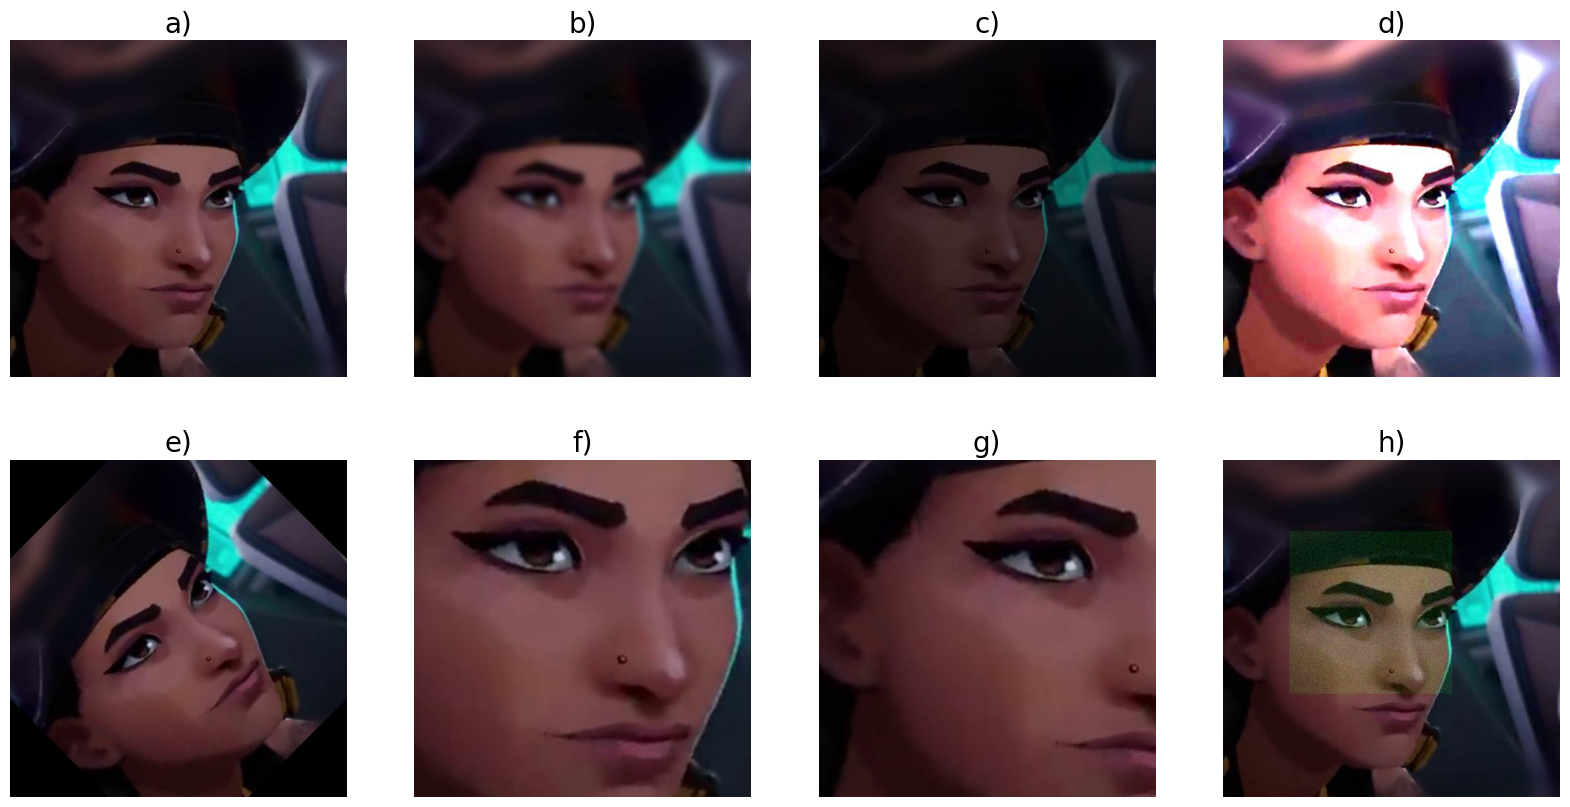

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

input = "/home/huyentn2/huyen/project/new_folder/cv_proj/DualStyleGAN/data_preparation/cartoon_images_augment/0_1_001_00504/"
files = ["blur_0.5_0_1_001_00504.jpg", "blur_3_0_1_001_00504.jpg", "delight_0.5_0_1_001_00504.jpg", "delight_3_0_1_001_00504.jpg",
         "rot_45_0_1_001_00504.jpg", "randcrop_8_0_1_001_00504.jpg", "randcrop_1_0_1_001_00504.jpg", "jitter_0_1_001_00504.jpg"]

inp = [Image.open(input+ file)  for file in files]




# inp1 = "0_1_006_05064.jpg"
# img1 = Image.open(input+ inp1)  
# inp.append(img1)
labels = ["a)", "b)", "c)", "d)", "e)", "f)", "g)", "h)"]

w = 25
h = 25
fig = plt.figure(figsize=(20, 10))
columns = 4
rows = 2
for i in range(1, columns*rows +1):
    # img = np.random.randint(10, size=(h,w))
    ax = fig.add_subplot(rows, columns, i)
    # ax.set_xlabel(labels[i-1])
    ax.set_title(labels[i-1], fontdict={'fontsize': 20, 'fontweight': 'medium'})
    plt.axis('off')
    plt.imshow(inp[i-1])
    
plt.show()
fig.savefig("/home/huyentn2/huyen/project/new_folder/cv_proj/DualStyleGAN/data_preparation/report/augment.png", bbox_inches='tight')
